# 0.0 IMPORTS

In [45]:
import pandas as pd
import numpy as np
import sqlite3
import sqlalchemy

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

## LOADING DATA

In [46]:
pwd

'C:\\Users\\Utilizador\\repos\\Python_ds_ao_dev\\Projeto_Book_to_Scrape'

In [47]:
path = 'C:\\Users\\Utilizador\\repos\\Python_ds_ao_dev\\Projeto_Book_to_Scrape\\'
database_name= 'book_one_db.sqlite'
conn = create_engine('sqlite:///' + path + database_name, echo=False)

In [48]:
query = """
    SELECT * FROM book_one
"""

In [49]:
data = pd.read_sql(query, con=conn)
data

,product_name,product_price,product_stock,product_star,product_catalog
0,The Secret Garden,15.08,In stock,Four,classic
1,The Metamorphosis,28.58,In stock,One,classic
2,The Pilgrim's Progress,50.26,In stock,Two,classic
3,The Hound of the ...,14.82,In stock,Two,classic
4,Little Women (Little Women ...,28.07,In stock,Four,classic
5,Gone with the Wind,32.49,In stock,Three,classic
6,Candide,58.63,In stock,Three,classic
7,Animal Farm,57.22,In stock,Three,classic
8,Wuthering Heights,17.73,In stock,Three,classic
9,The Picture of Dorian ...,29.70,In stock,Two,classic


In [50]:
data.to_csv('data_raw_book.csv')

# 1.0 DATA CLEANING

## Data Description

In [51]:
df1 = data.copy()

## 1.1 Data Dimensions

In [52]:
# Tamanho de linhas e colunas
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))   

Number of Rows: 57
Number of Cols: 5


## 1.2 Data types

In [53]:
df1.dtypes

product_name        object
product_price      float64
product_stock       object
product_star        object
product_catalog     object
dtype: object

## 1.3 Check NA

In [54]:
df1.isna().sum()

product_name       0
product_price      0
product_stock      0
product_star       0
product_catalog    0
dtype: int64

In [55]:
# percentage of missing data by total rows
df1.isna().sum() / data.shape[0]

product_name       0.0
product_price      0.0
product_stock      0.0
product_star       0.0
product_catalog    0.0
dtype: float64

##  1.4 Descriptive Statistical

In [56]:
# Selecting columns that contain only numeric data: int and float
num_attributes = df1.select_dtypes(include=['int64','float64' ])
num_attributes

,product_price
0,15.08
1,28.58
2,50.26
3,14.82
4,28.07
5,32.49
6,58.63
7,57.22
8,17.73
9,29.70


In [57]:
# Selecting columns that contain only categorical data: int and float
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])
cat_attributes

,product_name,product_stock,product_star,product_catalog
0,The Secret Garden,In stock,Four,classic
1,The Metamorphosis,In stock,One,classic
2,The Pilgrim's Progress,In stock,Two,classic
3,The Hound of the ...,In stock,Two,classic
4,Little Women (Little Women ...,In stock,Four,classic
5,Gone with the Wind,In stock,Three,classic
6,Candide,In stock,Three,classic
7,Animal Farm,In stock,Three,classic
8,Wuthering Heights,In stock,Three,classic
9,The Picture of Dorian ...,In stock,Two,classic


### 1.4.1 Numerical Attributes

In [58]:
# Tendência central: como os dados estão :

# Média
t1 = pd.DataFrame(num_attributes.apply(np.mean)).T

# Mediana
t2= pd.DataFrame(num_attributes.apply(np.median)).T

In [59]:
# Dispersão: std, min, max, range, skew(assimetria), kurtosis(calda longa)

d1 = pd.DataFrame(num_attributes.apply(np.std)).T

d2 = pd.DataFrame(num_attributes.apply(np.min)).T

d3 = pd.DataFrame(num_attributes.apply(np.max)).T

d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T

d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

In [60]:
# concat

m1 = pd.concat([d2, d3, d4, t1, t2, d1, d5, d6]).T.reset_index()
m1.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m1

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,product_price,10.65,58.63,47.98,34.381228,33.92,12.938244,-0.037975,-0.810083


C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


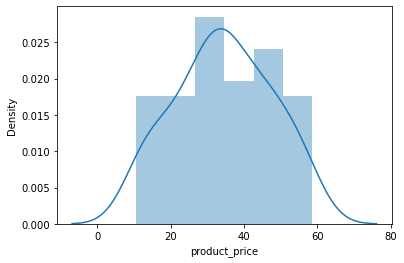

In [61]:
sns.distplot(df1['product_price']);

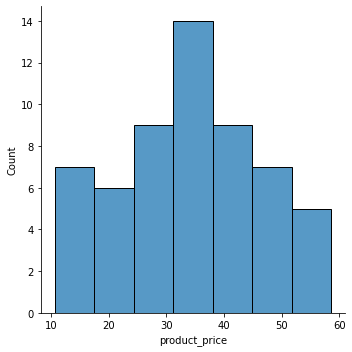

In [62]:
sns.displot(df1['product_price']);

### 1.4.2 Categorical Attributes

In [63]:
cat_attributes.apply(lambda x: x.unique().shape[0])

product_name       57
product_stock       1
product_star        5
product_catalog     4
dtype: int64

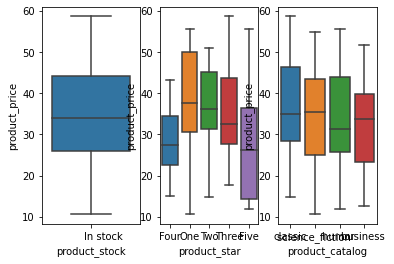

In [64]:
plt.subplot(1,3,1)
sns.boxplot(x='product_stock', y='product_price', data=df1)

plt.subplot(1,3,2)
sns.boxplot(x='product_star', y='product_price', data=df1)

plt.subplot(1,3,3)
sns.boxplot(x='product_catalog', y='product_price', data=df1);

## 2.0 Feature Engineering

In [65]:
df2 = df1.copy()

### 2.1 Hypothesis Creation

1. Livros clássicos deveriam ter maior número de estrelas
2. Livros clássicos deveriam ter maior maior preço

3. Livros de ficção científica deveriam ter menor número de estrelas
4. Livros de ficção cinetífica deverriam ter mennor preço

3. Livros de humor deveriam ter número de estrelas médio
4. Livros de humor deveriam ter preço médio

5. Livros de negócios deveriam ter número de estrelas menor que a média
6. Livros de negócios deveriam ter preço médio que a média

## 3.0 EXPLORATORY DATA ANALYSIS

### 3.1 Univariate Analysis

#### 3.1.1 Variable Analysis Answer

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


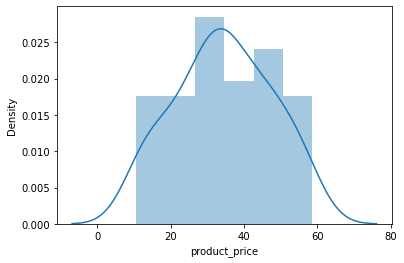

In [66]:
sns.distplot(df2['product_price']);

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


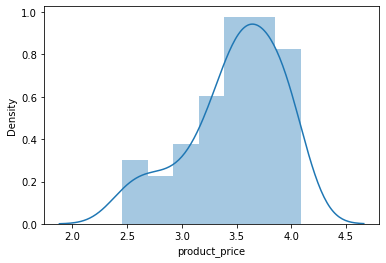

In [67]:
sns.distplot(np.log1p(df2['product_price']));

#### 3.1.2 Numerical Variable Analysis

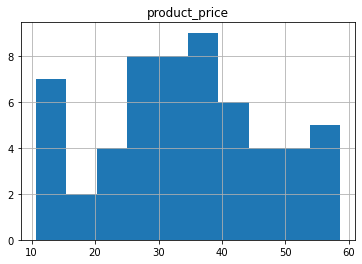

In [68]:
num_attributes.hist();

#### 3.1.3 Categorical Variable Analysis

In [69]:
cat_attributes.head()

,product_name,product_stock,product_star,product_catalog
0,The Secret Garden,In stock,Four,classic
1,The Metamorphosis,In stock,One,classic
2,The Pilgrim's Progress,In stock,Two,classic
3,The Hound of the ...,In stock,Two,classic
4,Little Women (Little Women ...,In stock,Four,classic


## product_catalog

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_catalog', ylabel='count'>

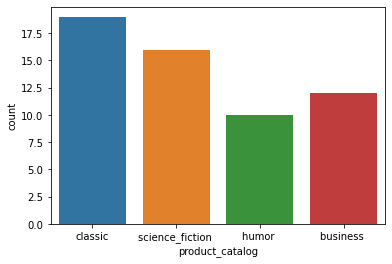

In [70]:
sns.countplot(df2['product_catalog'])

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_price', ylabel='Density'>

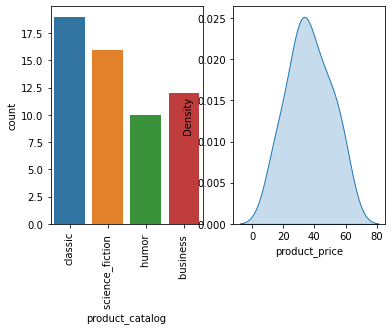

In [71]:
plt.subplot(1,2,1)
sns.countplot(df2['product_catalog'])
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.kdeplot(df2[df2['product_catalog'] == 'classic']        ['product_price'], label='classic' ,shade=True)
sns.kdeplot(df2[df2['product_catalog'] == 'science_fiction']['product_price'], label='science_fiction' ,shade=True)
sns.kdeplot(df2[df2['product_catalog'] == 'humor']          ['product_price'], label='humor' ,shade=True)
sns.kdeplot(df2[df2['product_catalog'] == 'business']       ['product_price'], label='business' ,shade=True)

## product_star

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_star', ylabel='count'>

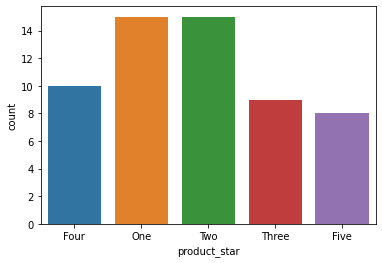

In [72]:
sns.countplot(df2['product_star'])

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_price', ylabel='Density'>

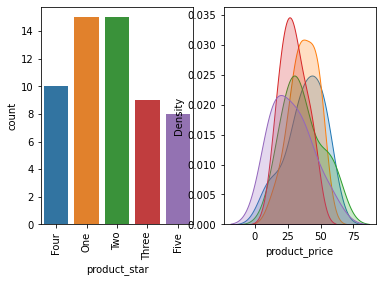

In [73]:
plt.subplot(1,2,1)
sns.countplot(df2['product_star'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.kdeplot(df2[df2['product_star'] == 'One']['product_price'], label='One' ,shade=True)
sns.kdeplot(df2[df2['product_star'] == 'Two']['product_price'], label='Two' ,shade=True)
sns.kdeplot(df2[df2['product_star'] == 'Three']['product_price'], label='Three' ,shade=True)
sns.kdeplot(df2[df2['product_star'] == 'Four']['product_price'], label='Four' ,shade=True)
sns.kdeplot(df2[df2['product_star'] == 'Five']['product_price'], label='Five' ,shade=True)

## 3.2 Bivariate Analysis

Hypotheses:

    1. Livros clássicos deveriam somar maior valor de preço

    2. Livros de ficção científica devriam somar menor valor de preço

    3. Livros de humor deveriam ter melhor valor de preço (preço médio)

    4. Livros de negócios deveriam ter menor valor de preço que a média
    
    5. Livros com menos estrelas deveriam ter menor valor de preço
    
    6. Livros com menos estrelas devereiam somar menor valor de preço
    
    7. O número de estrelas deveria infuenciar no valor de preço (proporcionalidade direta)


## **H1:**Livros clássicos deveriam somar maior valor de preço
    True: Livros clássicos somam maior valore de preço

In [74]:
aux1 = df2[['product_catalog', 'product_price']].groupby('product_catalog').sum().sort_values('product_price').reset_index()
aux1

,product_catalog,product_price
0,humor,335.01
1,business,389.52
2,science_fiction,540.84
3,classic,694.36


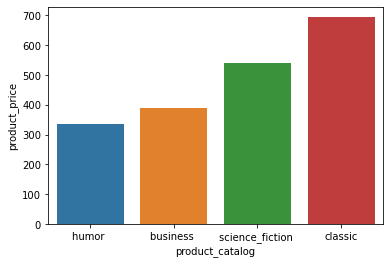

In [75]:
sns.barplot(x='product_catalog', y='product_price', data=aux1);

## **H2:**  Livros de ficção científica devriam somar menor valor de preço
    False: Livros de ficção científica possui maior valor mediano de preço

In [76]:
aux2 = df2[['product_catalog', 'product_price']].groupby('product_catalog').median().sort_values('product_price').reset_index()
aux2

,product_catalog,product_price
0,humor,31.290
1,business,33.630
2,classic,35.010
3,science_fiction,35.315


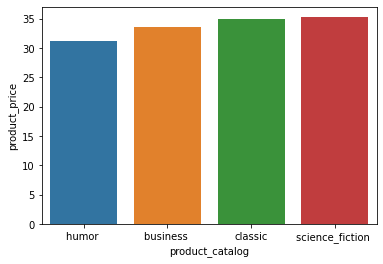

In [77]:
sns.barplot(x='product_catalog', y='product_price', data=aux2);

## **H3:**  de humor deveriam ter melhor valor de preço (preço médio)
    False: Livros de humor possuem o segundo melhor valor de preço médio

In [78]:
aux3 = df2[['product_catalog', 'product_price']].groupby('product_catalog').mean().sort_values('product_price').reset_index()
aux3

,product_catalog,product_price
0,business,32.460000
1,humor,33.501000
2,science_fiction,33.802500
3,classic,36.545263


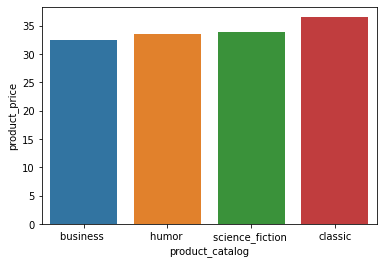

In [79]:
sns.barplot(x='product_catalog', y='product_price', data=aux3);

## **H4:** Livros de negócios deveriam ter menor valor de preço que a média
    True: Livros de negócios possuem menor valor de preço que a média

In [80]:
df2['product_price'].mean()

34.38122807017544

In [81]:
aux4 = df2[['product_catalog', 'product_price']].groupby('product_catalog').mean().sort_values('product_price').reset_index()
aux4

,product_catalog,product_price
0,business,32.460000
1,humor,33.501000
2,science_fiction,33.802500
3,classic,36.545263


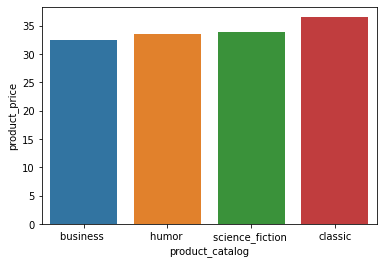

In [82]:
sns.barplot(x='product_catalog', y='product_price', data=aux4);

## **H5:** Livros com menos estrelas deveriam ter menor valor de preço
    True:

In [83]:
aux5 = df2[['product_star', 'product_price']].groupby('product_star').min().sort_values('product_price').reset_index()
aux5

,product_star,product_price
0,One,10.65
1,Five,11.83
2,Two,14.82
3,Four,15.08
4,Three,17.73


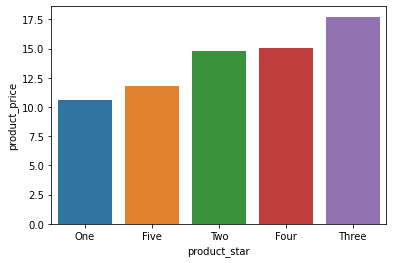

In [84]:
sns.barplot(x='product_star', y='product_price', data=aux5);

## **H6:** Livros com menos estrelas devereiam somar menor valor de preço
    False:

In [85]:
aux6 = df2[['product_star', 'product_price']].groupby('product_star').sum().sort_values('product_price').reset_index()
aux6

,product_star,product_price
0,Five,221.69
1,Four,291.13
2,Three,323.91
3,Two,553.36
4,One,569.64


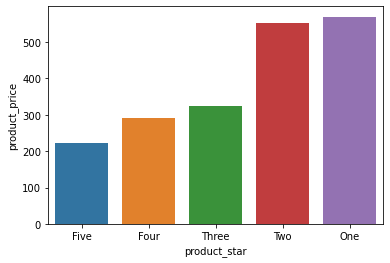

In [86]:
sns.barplot(x='product_star', y='product_price', data=aux6);

## **H7:** O número de estrelas deveria infuenciar no valor de preço (proporcionalidade direta)
    False

In [87]:
aux7 = df2[['product_star', 'product_catalog', 'product_price']].groupby(['product_star', 'product_catalog']).mean().sort_values('product_price').reset_index()
aux7

,product_star,product_catalog,product_price
0,Five,business,24.350000
1,Four,humor,25.980000
2,Three,business,27.490000
3,Five,humor,28.242500
4,Four,classic,28.280000
5,Four,science_fiction,29.672500
6,Four,business,33.340000
7,Two,business,34.435000
8,One,humor,34.810000
9,Two,science_fiction,34.955000


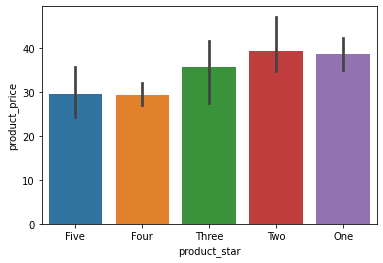

In [88]:
sns.barplot(x='product_star', y='product_price', data=aux7);